In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

# 2 (c) #

In [2]:
class Iteration:
    def __init__(self, g, max_val=1e4):
        self.g = g
        self.max_val = max_val
    def run(self, x0, k, returnList=False):
        l = [x0]
        for i in range(k):
            if abs(x0) > self.max_val:
                print('May be divergent')
                return l if returnList else x0
            x0 = self.g(x0)
            if returnList:
                l.append(x0)
        return l if returnList else x0
    def plot(self, x0, k, interval):
        fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')

        x = np.linspace(*interval, 100)
        y = self.g(x)
        ax.plot(x, y, label='$g$')
        ax.plot(x, x, label='$y=x$')

        xk = np.array(self.run(x0, k, returnList=True))
        ax.scatter(xk[1:-1], self.g(xk)[1:-1], zorder=3)
        ax.scatter(xk[0], self.g(xk[0]), c='r', label='start', zorder=3)
        ax.scatter(xk[-1], self.g(xk[-1]), c='y', label='end', zorder=3)

        x = []
        y = []
        for xi in xk:
            x.append(xi)
            y.append(self.g(xi))
            x.append(self.g(xi))
            y.append(self.g(xi))
        ax.plot(x[:-1], y[:-1], ls='--', c='k', label='cobwebbing')
        
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_aspect('equal')
        ax.grid('on')
        ax.legend()
        ax.set_xlim(interval)
        ax.set_ylim(interval)
        
        plt.show()
    def plot_speed(self, x0, k, realAnswer):
        y = np.array(self.run(x0, k, returnList=True))
        #print(y)
        x = np.arange(len(y))
        y = -np.log10(abs(realAnswer - y))
        
        fig, ax = plt.subplots(1, 2, figsize=(10, 5), layout='constrained')
        ax[0].plot(x, y)
        ax[0].set_xlabel('Number of iterations')
        ax[0].set_ylabel('Digits of precision')
        ax[0].grid('on')
        
        ax[1].plot(x[:-1], y[1:] - y[:-1])
        ax[1].set_xlabel('Number of iterations')
        ax[1].set_ylabel('Digits of precision gained')
        ax[1].grid('on')
        plt.show()

In [3]:
def z(a):
    return (lambda x: a * x ** 3 - 4 * a * x + x)

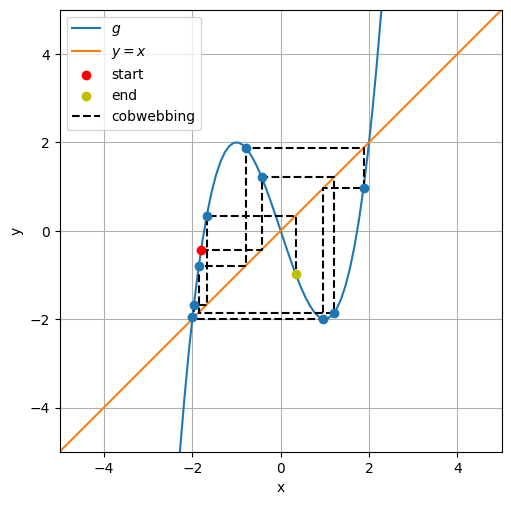

In [4]:
itr = Iteration(z(1))
itr.plot(-1.8, 10, (-5, 5))

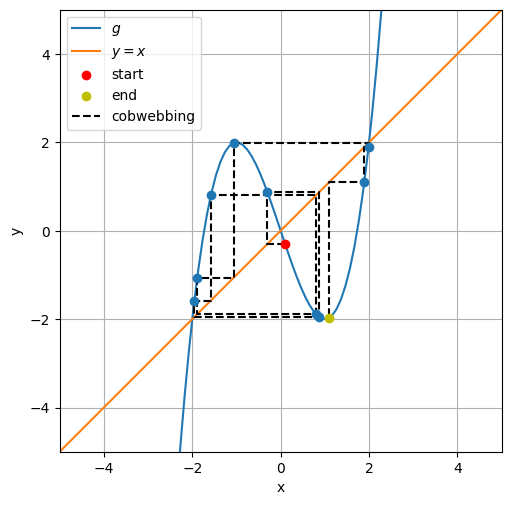

In [5]:
itr = Iteration(z(1))
itr.plot(0.1, 10, (-5, 5))

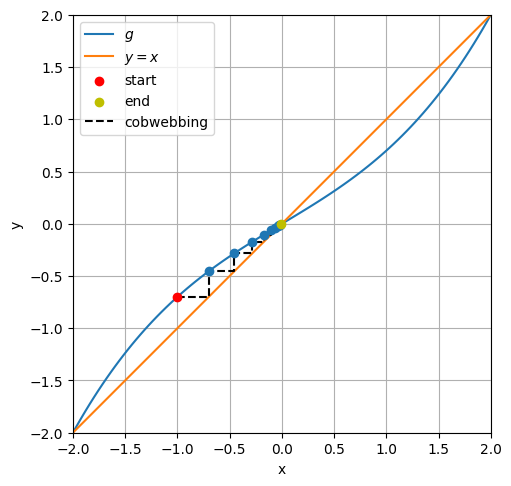

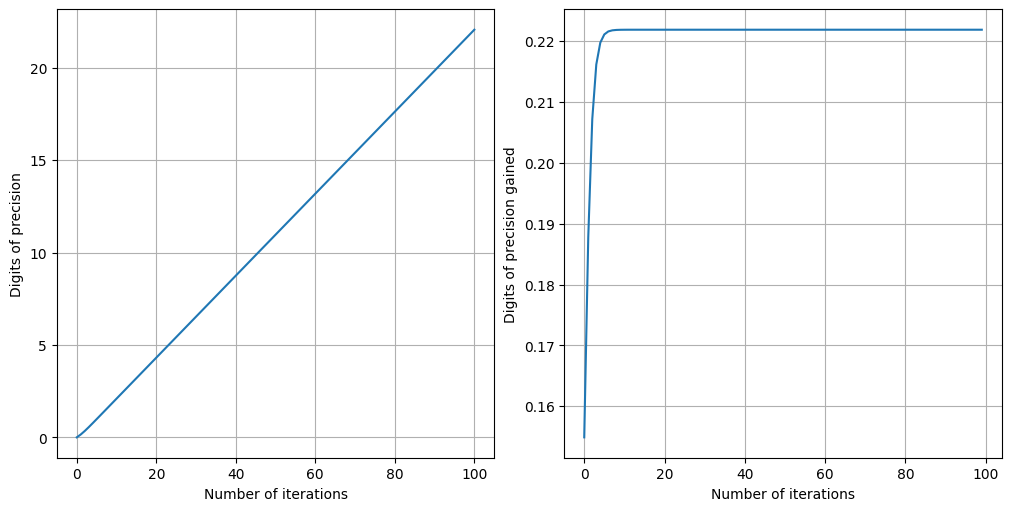

In [6]:
itr = Iteration(z(0.1))
itr.plot(-1, 10, (-2, 2))
itr.plot_speed(-1, 100, 0) # -log(|1-4*0.1|)~0.22184874961

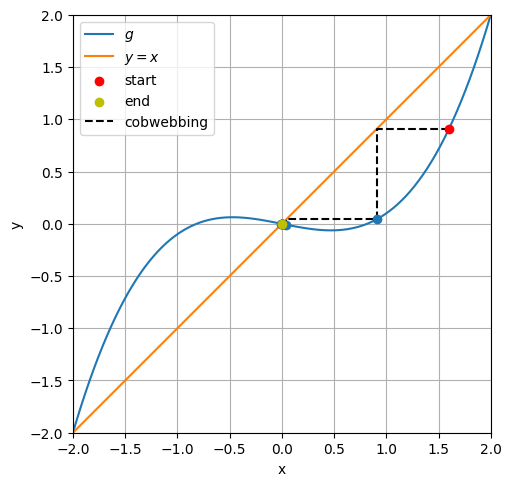

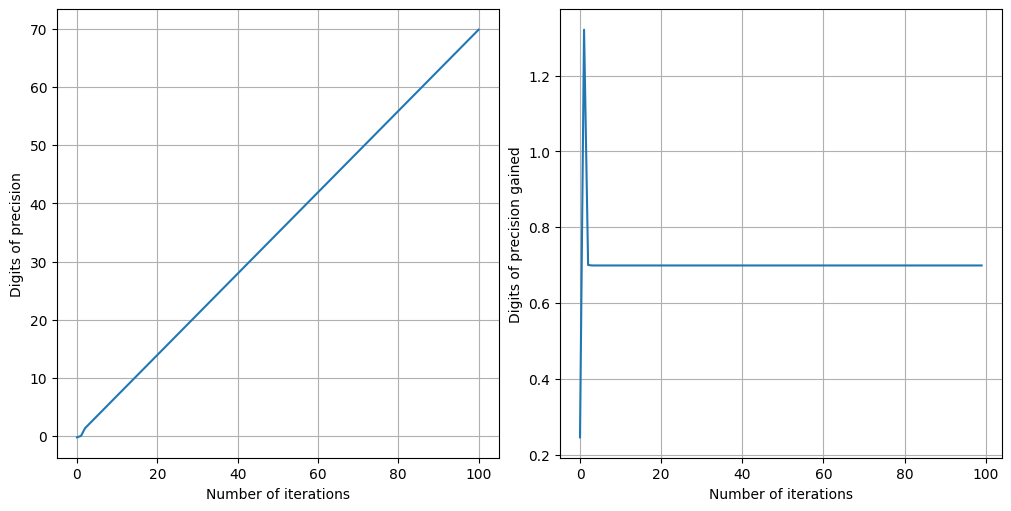

In [7]:
itr = Iteration(z(0.3))
itr.plot(1.6, 10, (-2, 2))
itr.plot_speed(1.6, 100, 0) # -log(|1-4*0.3|)~0.69897000433

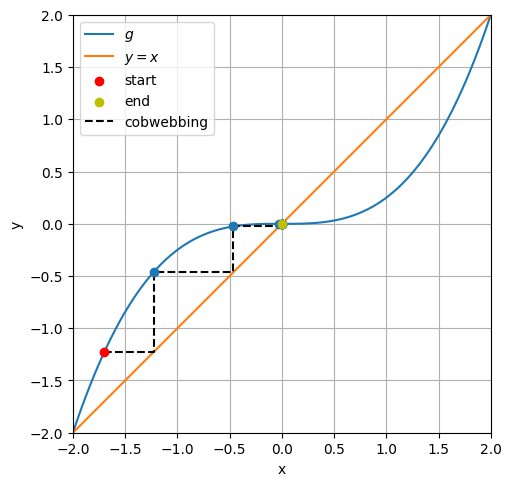

/tmp/ipykernel_247933/970854538.py:50: RuntimeWarning: divide by zero encountered in log10
  y = -np.log10(abs(realAnswer - y))
/tmp/ipykernel_247933/970854538.py:58: RuntimeWarning: invalid value encountered in subtract
  ax[1].plot(x[:-1], y[1:] - y[:-1])


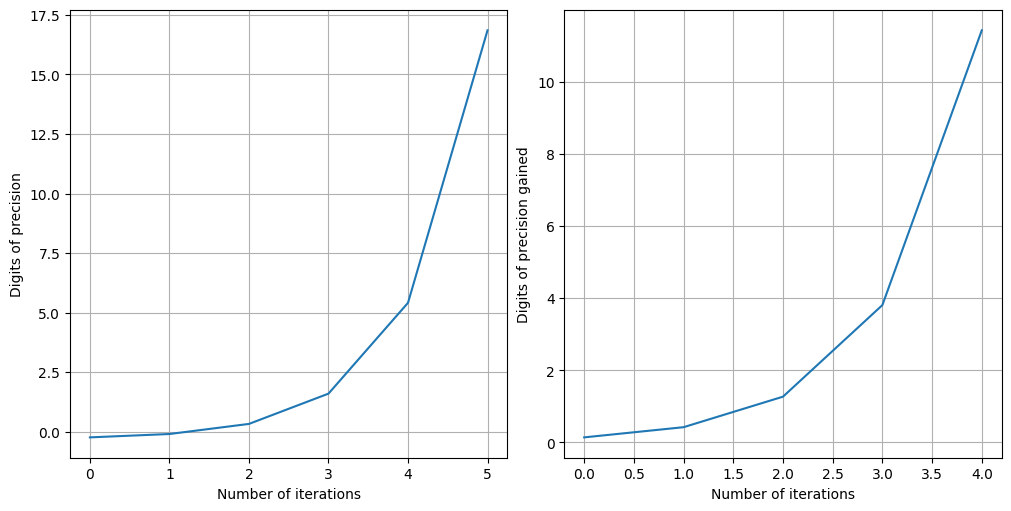

In [8]:
itr = Iteration(z(0.25))
itr.plot(-1.7, 10, (-2, 2))
itr.plot_speed(-1.7, 100, 0) # superlinear q=3

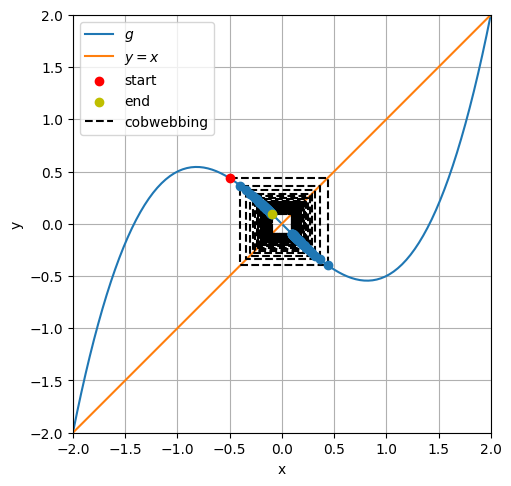

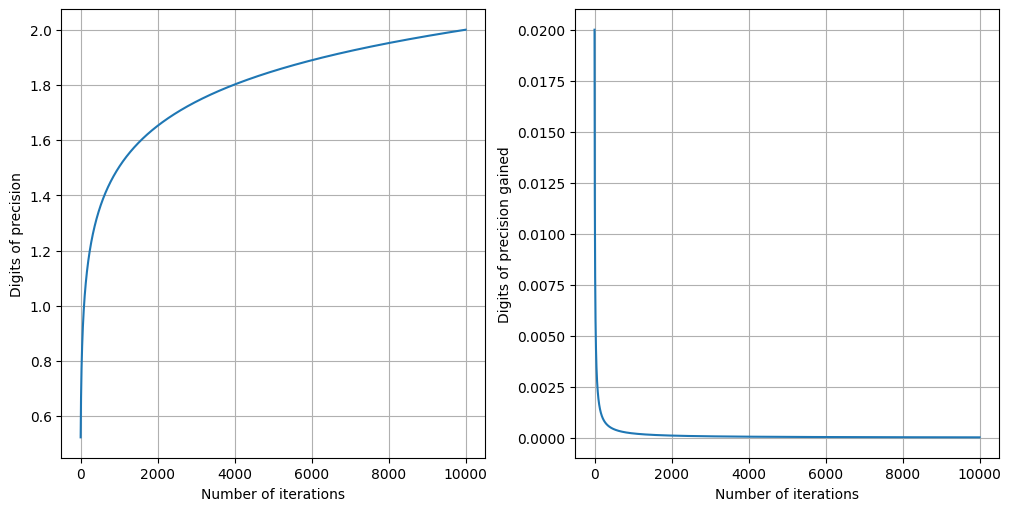

In [9]:
itr = Iteration(z(0.5))
itr.plot(-0.5, 100, (-2, 2))
itr.plot_speed(-0.3, 10000, 0)

# 4 (b) #

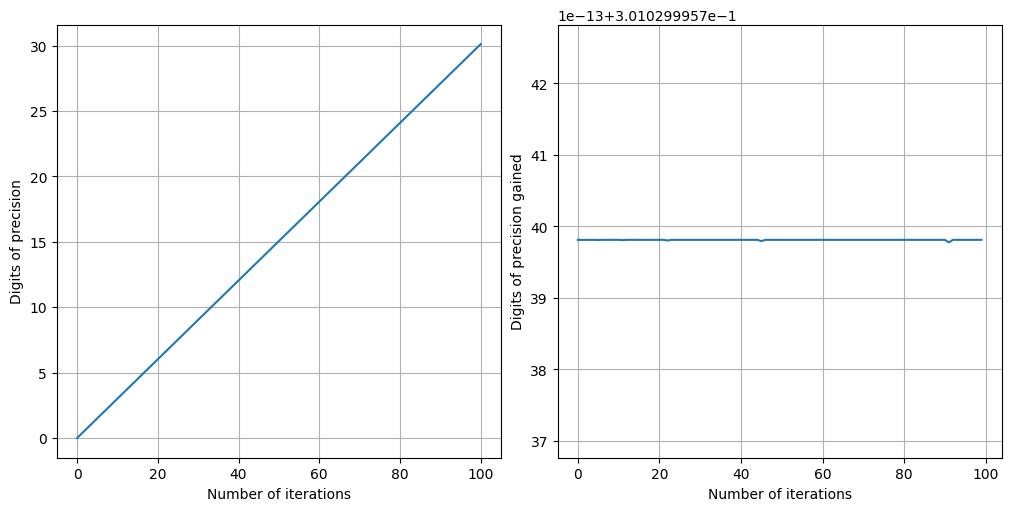

In [10]:
alpha = 0.5
itr = Iteration(lambda x: alpha * x)
itr.plot_speed(1, 100, 0) # -log(0.5)~0.30102999566

/tmp/ipykernel_247933/970854538.py:50: RuntimeWarning: divide by zero encountered in log10
  y = -np.log10(abs(realAnswer - y))
/tmp/ipykernel_247933/970854538.py:58: RuntimeWarning: invalid value encountered in subtract
  ax[1].plot(x[:-1], y[1:] - y[:-1])


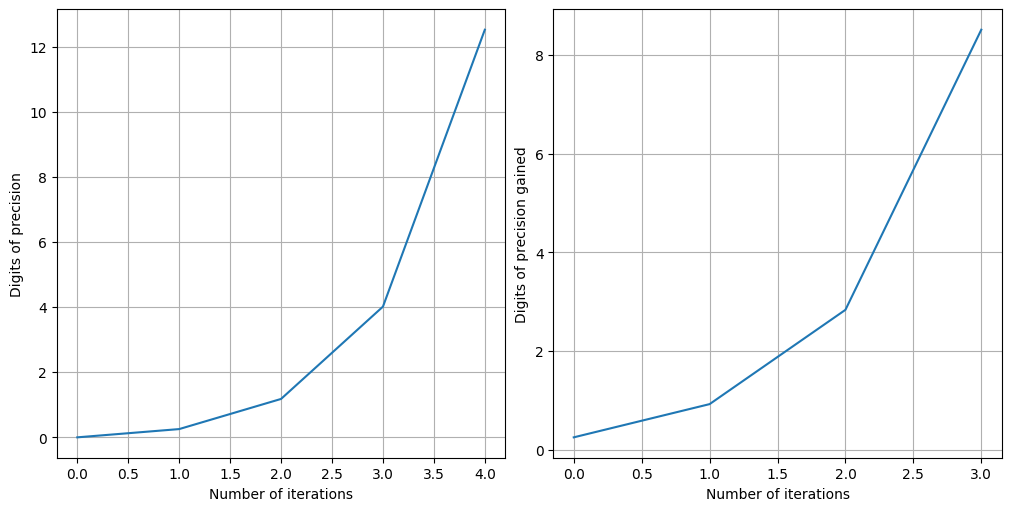

In [11]:
itr = Iteration(lambda x: x - np.tan(x))
itr.plot_speed(1, 100, 0)

/tmp/ipykernel_247933/970854538.py:50: RuntimeWarning: divide by zero encountered in log10
  y = -np.log10(abs(realAnswer - y))
/tmp/ipykernel_247933/970854538.py:58: RuntimeWarning: invalid value encountered in subtract
  ax[1].plot(x[:-1], y[1:] - y[:-1])


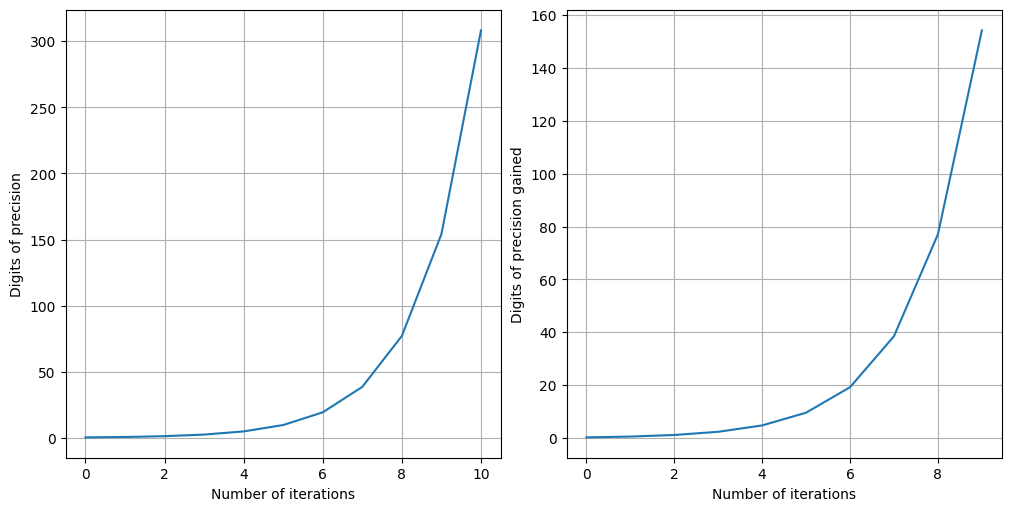

In [12]:
itr = Iteration(lambda x: x ** 2)
itr.plot_speed(0.5, 100, 0)

# 5 #

In [13]:
class Newton(Iteration):
    def __init__(self, f, df, max_val=1e3):
        self.f = f
        self.df = df
        self.g = lambda x: x - f(x) / df(x)
        self.max_val = max_val
    def nplot(self, x0, k, intervalx, intervaly):
        fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')

        x = np.linspace(*intervalx, 1000)
        y = self.f(x)
        ax.plot(x, y, lw=2, label='$f$')
        ax.axhline(0, lw=2, c='k', zorder=1)
        ax.axvline(0, lw=2, c='k', zorder=1)

        xk = np.array(self.run(x0, k, returnList=True))
        zero = np.zeros(k - 1)
        ax.scatter(xk[1:-1], zero, zorder=4)
        ax.scatter(xk[0], 0, c='r', label='start', zorder=4)
        ax.scatter(xk[-1], 0, c='y', label='end', zorder=4)
        ax.scatter(xk, self.f(xk), zorder=3)

        for xi in xk[:-1]:
            ax.plot(x, self.df(xi) * (x - xi) + self.f(xi), ls=':', c='r', zorder=1)
        for xi in xk:
            ax.plot([xi, xi], [0, self.f(xi)], ls='--', c='k', zorder=0)
        
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_aspect('equal')
        ax.grid('on')
        ax.legend()

        ax.set_xlim(intervalx)
        ax.set_ylim(intervaly)
        
        plt.show()

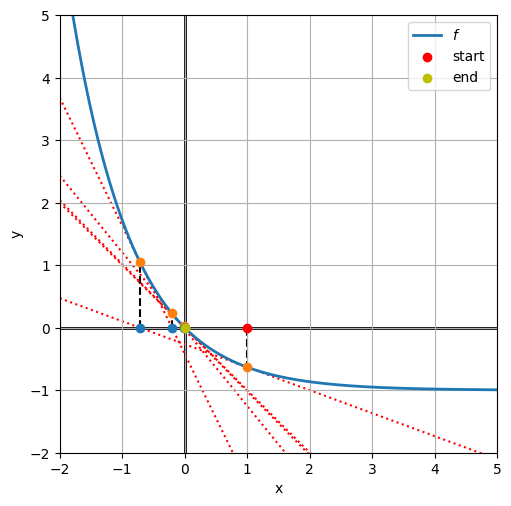

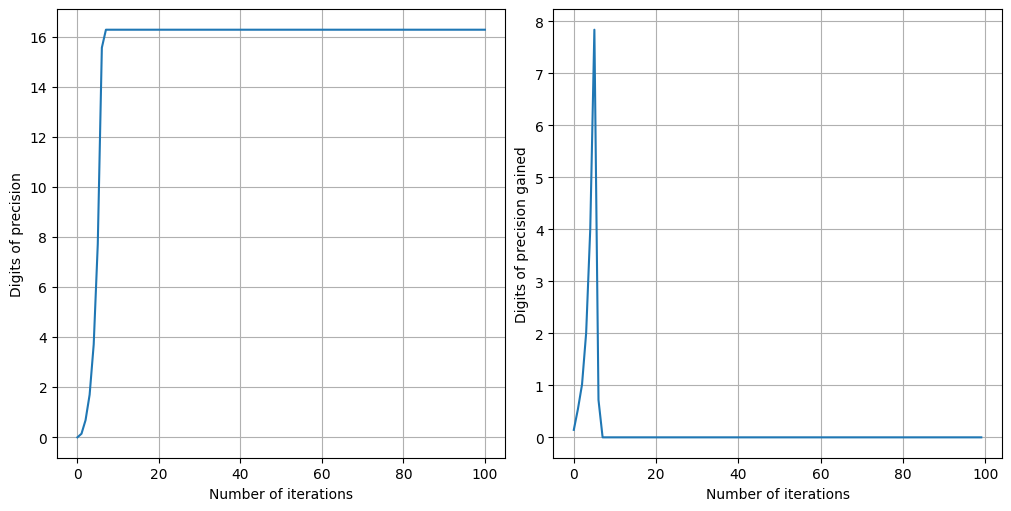

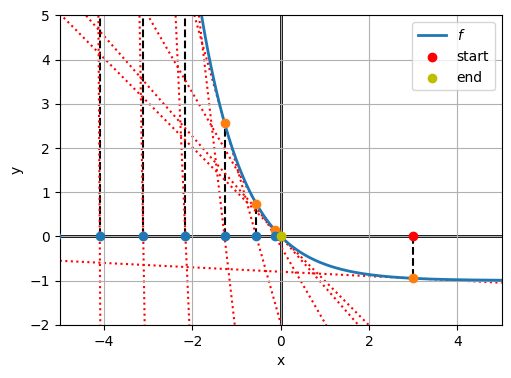

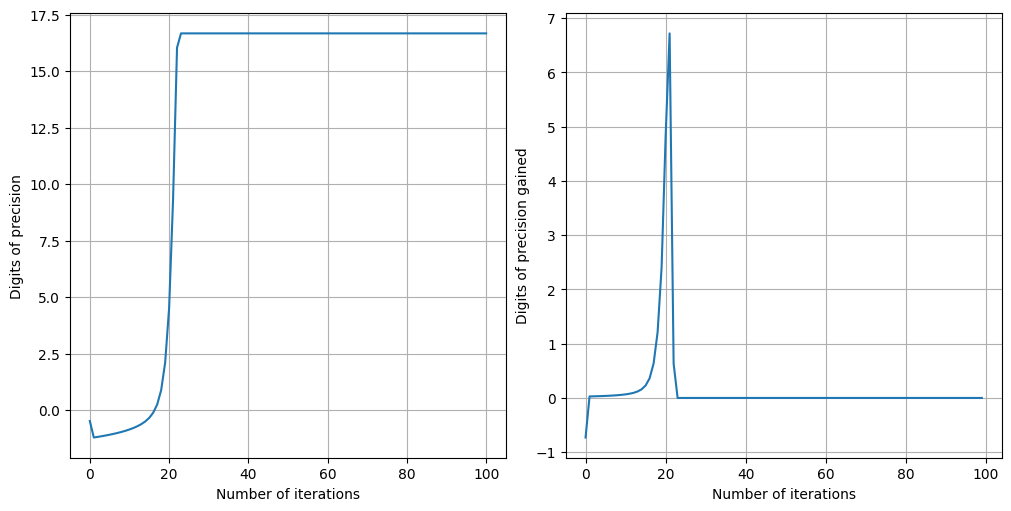

In [14]:
itr = Newton((lambda x: math.e ** (-x) - 1), (lambda x: -math.e ** (-x)))
itr.nplot(1, 5, (-2, 5), (-2, 5))
itr.plot_speed(1, 100, 0)

itr.nplot(3, 20, (-5, 5), (-2, 5))
itr.plot_speed(3, 100, 0)

/tmp/ipykernel_247933/1140511330.py:1: RuntimeWarning: divide by zero encountered in log
  itr = Newton((lambda x: np.log(x)), (lambda x: 1 / x))


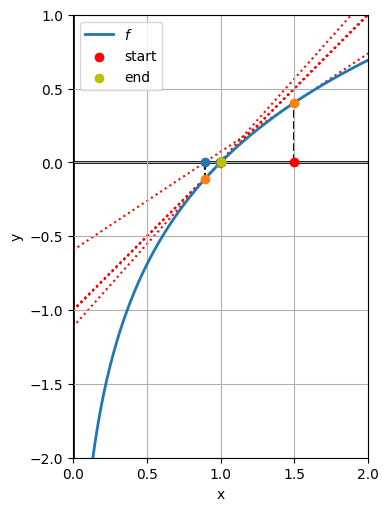

/tmp/ipykernel_247933/970854538.py:50: RuntimeWarning: divide by zero encountered in log10
  y = -np.log10(abs(realAnswer - y))
/tmp/ipykernel_247933/970854538.py:58: RuntimeWarning: invalid value encountered in subtract
  ax[1].plot(x[:-1], y[1:] - y[:-1])


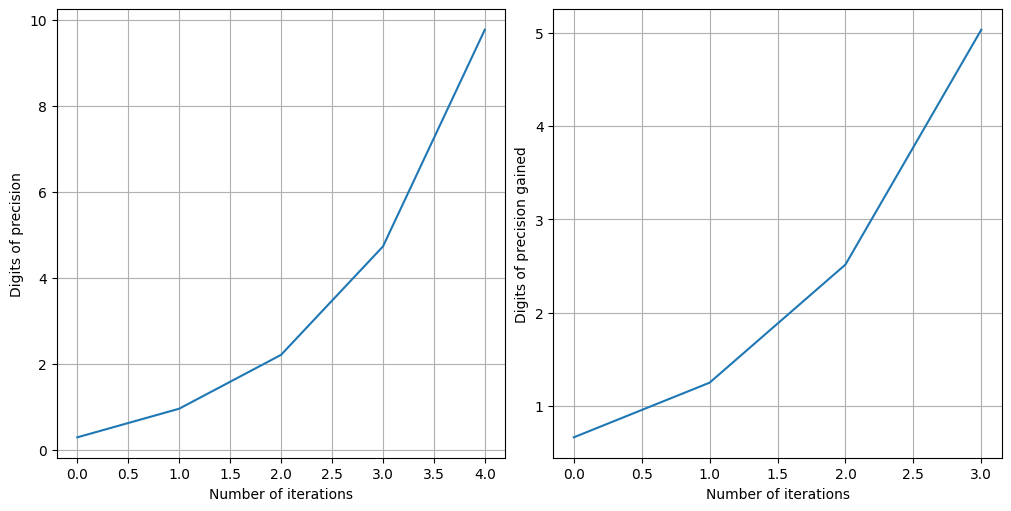

/tmp/ipykernel_247933/1140511330.py:1: RuntimeWarning: invalid value encountered in log
  itr = Newton((lambda x: np.log(x)), (lambda x: 1 / x))


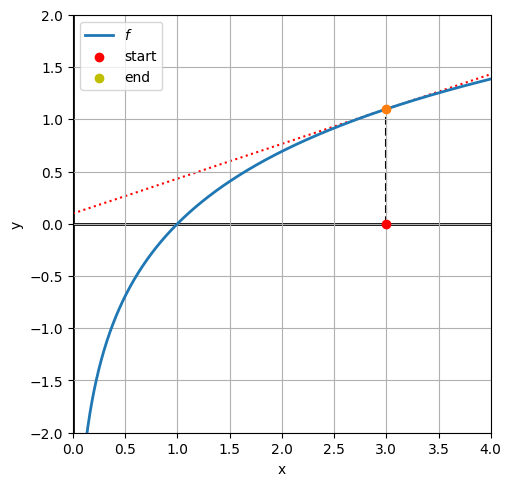

In [15]:
itr = Newton((lambda x: np.log(x)), (lambda x: 1 / x))
itr.nplot(1.5, 5, (0, 2), (-2, 1))
itr.plot_speed(1.5, 100, 1)

itr.nplot(3, 5, (0, 4), (-2, 2))

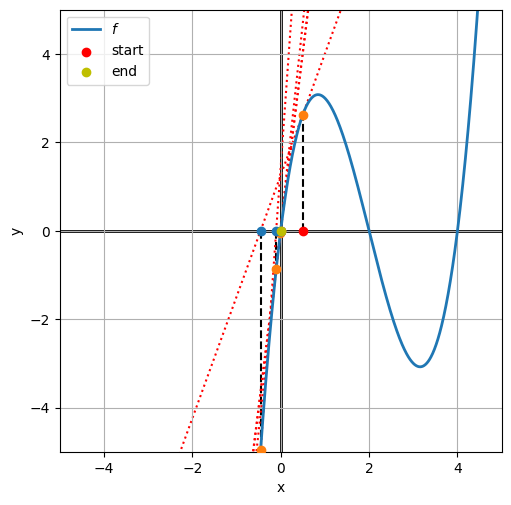

/tmp/ipykernel_247933/970854538.py:50: RuntimeWarning: divide by zero encountered in log10
  y = -np.log10(abs(realAnswer - y))
/tmp/ipykernel_247933/970854538.py:58: RuntimeWarning: invalid value encountered in subtract
  ax[1].plot(x[:-1], y[1:] - y[:-1])


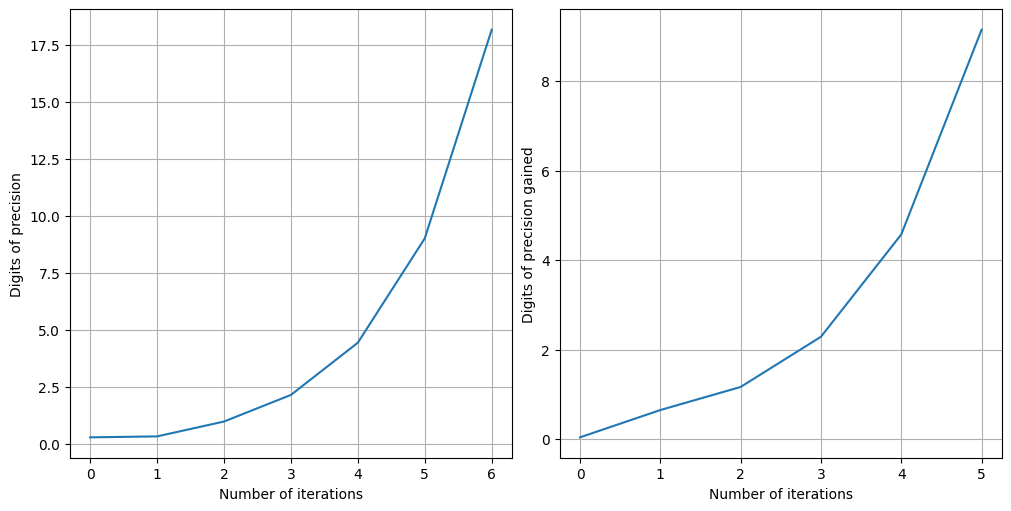

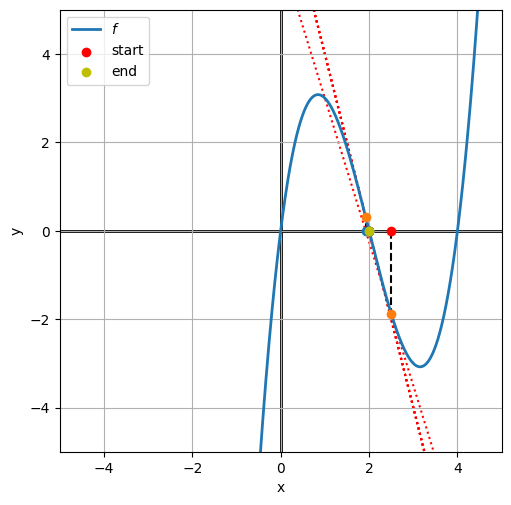

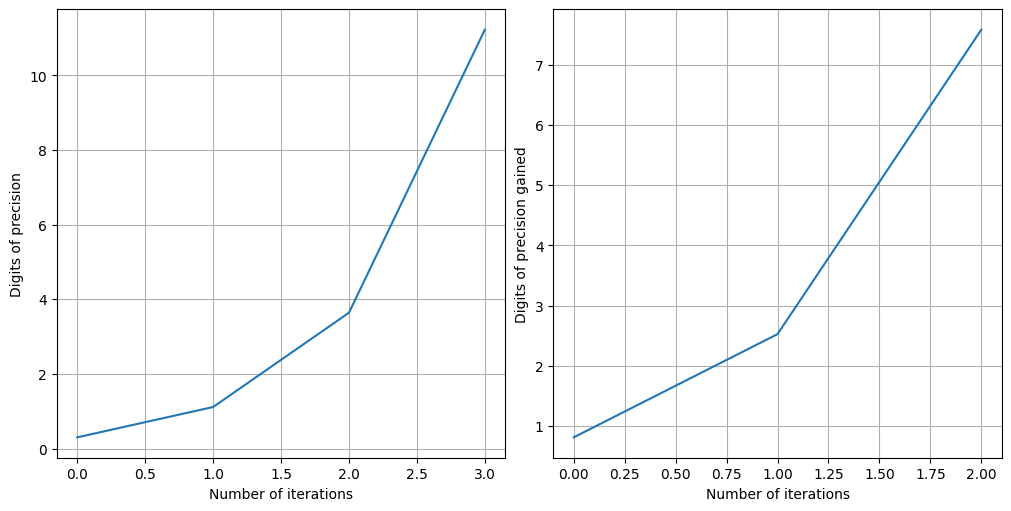

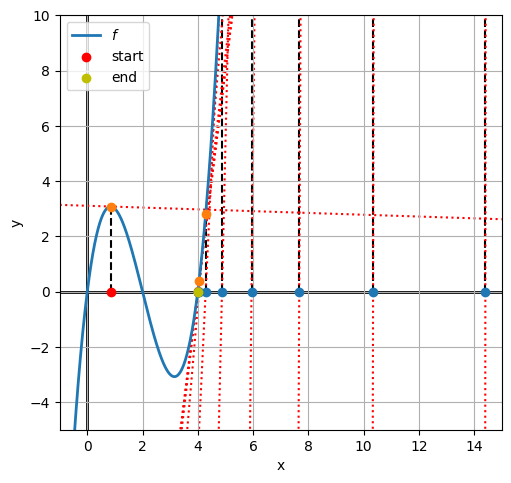

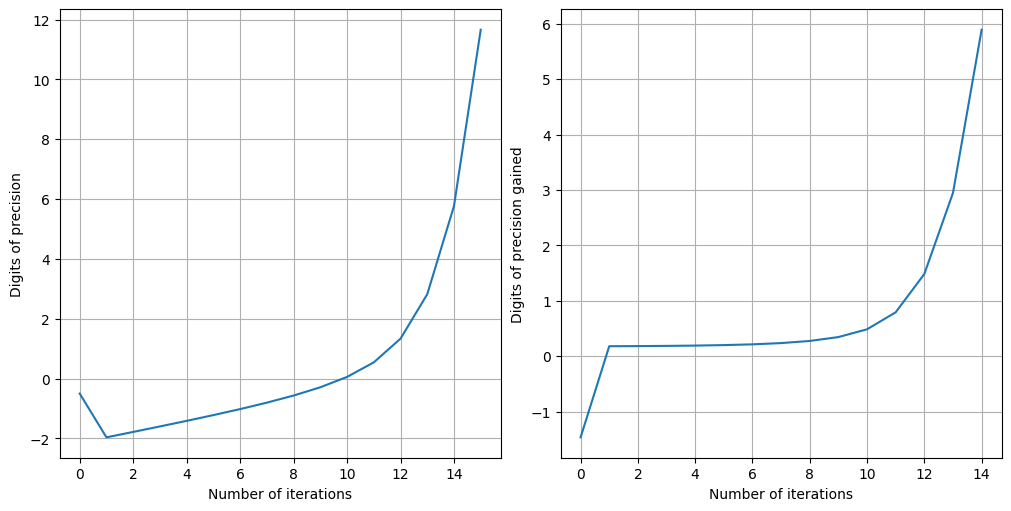

In [16]:
itr = Newton((lambda x: x * (x - 2) * (x - 4)), (lambda x: 3 * x ** 2 - 12 * x + 8))
itr.nplot(0.5, 5, (-5, 5), (-5, 5))
itr.plot_speed(0.5, 100, 0)

itr.nplot(2.5, 5, (-5, 5), (-5, 5))
itr.plot_speed(2.5, 100, 2)

# itr.nplot((2 / 3) * (3 - math.sqrt(3)), 5, (-5, 5), (-5, 5))
itr.nplot(0.85, 15, (-1, 15), (-5, 10))
itr.plot_speed(0.85, 100, 4)

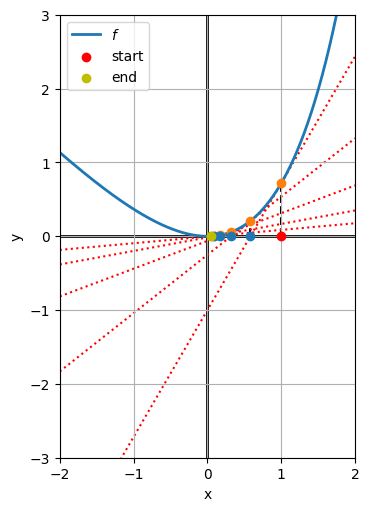

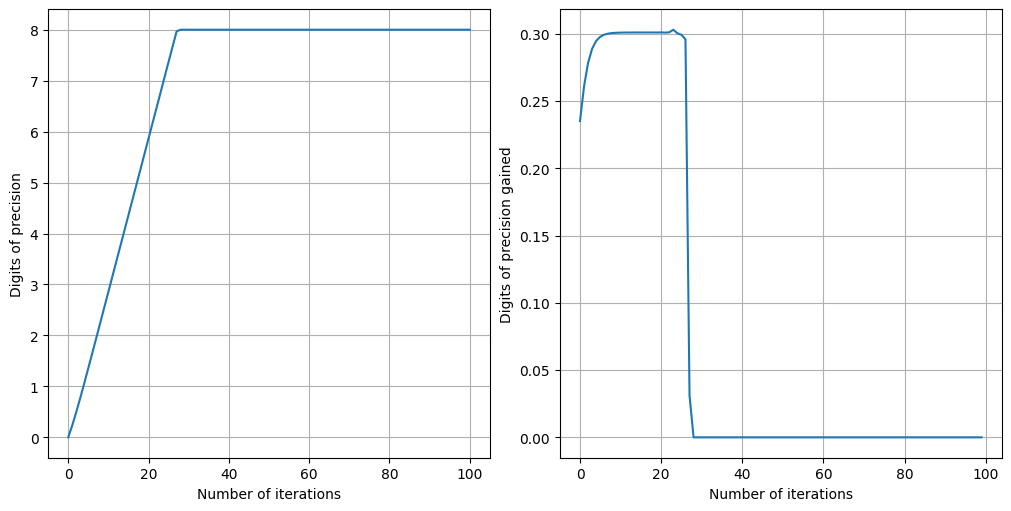

In [17]:
itr = Newton((lambda x: math.e ** x - x - 1), (lambda x: math.e ** x - 1))
itr.nplot(1, 5, (-2, 2), (-3, 3))
itr.plot_speed(1, 100, 0)